<a href="https://colab.research.google.com/github/MJRSBR/Ravenna/blob/main/Ravenna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This collab was design in Python as part of the End-of-life Project in Ravenna - Italy

> The source of data was the excel file shared in the Google Drive BDG_04d_Accessi_PS_pazienti_in_CRA_FU_dett_Sdo_AnonimoAUSLRO.xlsx

> The author had autorization to use the material 





In [ ]:
import numpy as np
import pandas as pd
from __future__ import print_function

**Install xlrd to read Excel file**

In [ ]:
!pip install xlrd
print("xlrd installed!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
xlrd installed!


**Upload Excel file to Collab after some mandatory adjusts in the original spread cheat to Python**

*PS: this command has effect only running in Google Chrome* 

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BD-2.xlsx to BD-2.xlsx
User uploaded file "BD-2.xlsx" with length 583899 bytes


**Read Excel spread cheet to Collab Environment**

In [87]:
df = pd.read_excel('/content/BD-2.xlsx',
                   engine='openpyxl',
                   #sheet_name= 1,
                   skiprows=14
                   )
df.head(2)

,Distretto,Str. Residenziale,Identificativo Ospite,Flg FU,Identificativo accesso PS,Data accesso PS,Ora accesso PS,Diagnosi principale PS,Identificativo SDO,Data Ammissione,Data Dimissione,Modalità Dim,2021,2022
0,035 - DISTRETTO RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",7663318^S00290^20220101,N,080114^080072^2022400146452,2022-11-29,10:30,4270 - TACHICARDIA PAROSSISTICA SOPRAVENTRICOLARE,-,NaT,NaT,NaN,NaN,1.0
1,035 - DISTRETTO RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",7669995^S00290^20220817,N,080114^080072^2022400110197,2022-09-06,11:33,7806 - FEBBRE (DI ORIGINE SCONOSCIUTA),080072^22018570,2022-09-06,2022-09-15,DECEDUTO,NaN,1.0


# Data Engineering

**Considering that the `null` objects found in the dataset is due to absence of fill in in the columns `2021` and `2022`,  the recomendation is to apply a function that will erase the objects `nan`. Also considering that the columns `2021` and `2022` record the occurrence in the specif year, it'll be create a *unique column* `Year` for the records and its values according the year that occured.**

*PS: the new column will be created at the end of the dataset*

In [88]:
df['2021'] = df['2021'].apply(str).str.replace('1', '2021')
df['2022'] = df['2022'].apply(str).str.replace('1', '2022')

# deleting nan
df['2021'] = df['2021'].str.replace('nan', '')
df['2022'] = df['2022'].str.replace('nan', '')

# deleting .0
df['2021'] = df['2021'].str.replace('2021.0', '2021')
df['2022'] = df['2022'].str.replace('2022.0', '2022')

<ipython-input-88-3e113b41372c>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['2021'] = df['2021'].str.replace('2021.0', '2021')
<ipython-input-88-3e113b41372c>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['2022'] = df['2022'].str.replace('2022.0', '2022')


In [89]:
# creating a new column
df["Year"] = df['2021'] + df['2022']

In [90]:
# Deleting old columns
df.drop(columns=["2021", "2022"], inplace=True)

**To facilitate the reading and future data manipulation the words DISTRETTO and - VALLE DEL SAIO from column `Distretto` will be deleted**

In [91]:
df['Distretto'] = df['Distretto'].str.replace('DISTRETTO','')
df['Distretto'] = df['Distretto'].str.replace('- VALLE DEL SAVIO', '')

**Creating a new colunm `Giorni di recuvero` in the dataset with number of hospitalization days and changing colunm type `Giorno di ricuvero` from `datetime` to `object`**

*PS: the new column will be created at the end of the dataset*

In [92]:
df['Giorni di ricuvero'] = df['Data Dimissione'] - df['Data Ammissione']
df['Giorni di ricuvero'] = df['Giorni di ricuvero'].apply(str).str.replace('days', '')
df['Giorni di ricuvero'] = df['Giorni di ricuvero'].str.replace('NaT', '0')
df['Giorni di ricuvero'] = df['Giorni di ricuvero'].str.replace('  00:00:00', '')

df.head(2)

,Distretto,Str. Residenziale,Identificativo Ospite,Flg FU,Identificativo accesso PS,Data accesso PS,Ora accesso PS,Diagnosi principale PS,Identificativo SDO,Data Ammissione,Data Dimissione,Modalità Dim,Year,Giorni di ricuvero
0,035 - RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",7663318^S00290^20220101,N,080114^080072^2022400146452,2022-11-29,10:30,4270 - TACHICARDIA PAROSSISTICA SOPRAVENTRICOLARE,-,NaT,NaT,NaN,2022,0
1,035 - RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",7669995^S00290^20220817,N,080114^080072^2022400110197,2022-09-06,11:33,7806 - FEBBRE (DI ORIGINE SCONOSCIUTA),080072^22018570,2022-09-06,2022-09-15,DECEDUTO,2022,9


In [93]:
df['Giorni di ricuvero'] = pd.to_numeric(df['Giorni di ricuvero'])
df.dtypes

Distretto                            object
Str. Residenziale                    object
Identificativo Ospite                object
Flg FU                               object
Identificativo accesso PS            object
Data accesso PS              datetime64[ns]
Ora accesso PS                       object
Diagnosi principale PS               object
Identificativo SDO                   object
Data Ammissione              datetime64[ns]
Data Dimissione              datetime64[ns]
Modalità Dim                         object
Year                                 object
Giorni di ricuvero                    int64
dtype: object

**Checking how many `null` objects we have in the datase**t

In [94]:
df.isnull().sum()

Distretto                       0
Str. Residenziale               0
Identificativo Ospite           0
Flg FU                          0
Identificativo accesso PS       0
Data accesso PS                 0
Ora accesso PS                  0
Diagnosi principale PS          0
Identificativo SDO              0
Data Ammissione              3714
Data Dimissione              3714
Modalità Dim                 3714
Year                            0
Giorni di ricuvero              0
dtype: int64

**Split values in the columns for future analysis**

In [95]:
# new data frame with values splited
new = df['Distretto'].str.split("-", expand=True)
new1 = df['Identificativo Ospite'].str.split("^", expand=True)
new2 = df['Identificativo accesso PS'].str.split("^", expand=True)
new3 = df['Identificativo SDO'].str.split("^", expand=True)

# separating colunms from the new data frame
df["cod_Distretto"] = new[0]
df["Nome Distretto"] = new[1] 
df["cod_ID_Osp_1"] = new1[0]
df["cod_ID_Osp_2"] = new1[1]
df["cod_ID_Osp_3"] = new1[2]
df["cod_ID_Accesso_PS_1"] = new2[0]
df["cod_ID_Accesso_PS_2"] = new2[1]
df["cod_ID_Accesso_PS_3"] = new2[1]
df["cod_ID_SDO_1"] = new3[0]
df["cod_ID_SDO_2"] = new3[1]

**Deleting old columns**

In [96]:
# Deleting old columns
df.drop(columns=["Distretto"], inplace=True)
df.drop(columns=["Identificativo Ospite"], inplace=True)
df.drop(columns=["Identificativo accesso PS"], inplace=True)
df.drop(columns=["Identificativo SDO"], inplace=True)

**Checking the dataframe shape and variales type**

In [97]:
df.shape

(7142, 20)

In [98]:
df.dtypes

Str. Residenziale                 object
Flg FU                            object
Data accesso PS           datetime64[ns]
Ora accesso PS                    object
Diagnosi principale PS            object
Data Ammissione           datetime64[ns]
Data Dimissione           datetime64[ns]
Modalità Dim                      object
Year                              object
Giorni di ricuvero                 int64
cod_Distretto                     object
Nome Distretto                    object
cod_ID_Osp_1                      object
cod_ID_Osp_2                      object
cod_ID_Osp_3                      object
cod_ID_Accesso_PS_1               object
cod_ID_Accesso_PS_2               object
cod_ID_Accesso_PS_3               object
cod_ID_SDO_1                      object
cod_ID_SDO_2                      object
dtype: object

**For consistency, ensure that all column labels of type string.**

In [99]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

True


**Set the Nome Distretto as index - useful for quickly looking up `Distretto` using `.loc` method**

In [100]:
df.set_index('Nome Distretto', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df.head()

,Str. Residenziale,Flg FU,Data accesso PS,Ora accesso PS,Diagnosi principale PS,Data Ammissione,Data Dimissione,Modalità Dim,Year,Giorni di ricuvero,cod_Distretto,cod_ID_Osp_1,cod_ID_Osp_2,cod_ID_Osp_3,cod_ID_Accesso_PS_1,cod_ID_Accesso_PS_2,cod_ID_Accesso_PS_3,cod_ID_SDO_1,cod_ID_SDO_2
Nome Distretto,,,,,,,,,,,,,,,,,,,
RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",N,2022-11-29,10:30,4270 - TACHICARDIA PAROSSISTICA SOPRAVENTRICOLARE,NaT,NaT,NaN,2022,0,035,7663318,S00290,20220101,080114,080072,080072,-,None
RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",N,2022-09-06,11:33,7806 - FEBBRE (DI ORIGINE SCONOSCIUTA),2022-09-06,2022-09-15,DECEDUTO,2022,9,035,7669995,S00290,20220817,080114,080072,080072,080072,22018570
RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",N,2021-06-02,13:18,3069 - DISFUNZIONI PSICOFISIOLOGICHE NON SPECI...,NaT,NaT,NaN,2021,0,035,7705419,S00290,20210518,080114,080072,080072,-,None
RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",N,2021-05-14,12:33,3009 - DISTURBI PSICHICI NON PSICOTICI NON SPE...,NaT,NaT,NaN,2021,0,035,7752042,S00290,20210304,080114,080072,080072,-,None
RAVENNA,"S00290 - CASA RESIDENZA PER ANZIANI ""ZALAMBANI""",N,2022-02-21,19:13,27651 - DISIDRATAZIONE,NaT,NaT,NaN,2022,0,035,7781884,S00290,20220101,080114,080072,080072,-,None


 **To get the index and columns as lists, was used the tolist() method.**

In [101]:
df.columns.tolist()

['Str. Residenziale',
 'Flg FU',
 'Data accesso PS',
 'Ora accesso PS',
 'Diagnosi principale PS',
 'Data Ammissione',
 'Data Dimissione',
 'Modalità Dim',
 'Year',
 'Giorni di ricuvero',
 'cod_Distretto',
 'cod_ID_Osp_1',
 'cod_ID_Osp_2',
 'cod_ID_Osp_3',
 'cod_ID_Accesso_PS_1',
 'cod_ID_Accesso_PS_2',
 'cod_ID_Accesso_PS_3',
 'cod_ID_SDO_1',
 'cod_ID_SDO_2']

In [ ]:
df.index.tolist()

**A quick view summary of each column in our dataframe using the `describe()` method.**

In [105]:
df.describe()

,Giorni di ricuvero
count,7142.000000
mean,4.761131
std,7.664551
min,0.000000
25%,0.000000
50%,0.000000
75%,8.000000
max,82.000000


# PLOTS

In [106]:
#% matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

In [107]:
mpl.style.use('ggplot')  # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


**Create a new dataframe of the top ten Districts, considering days of hospitalization, called `df_top10` and fix the axis to plot**

In [178]:
df_test.sort_values(['Giorni di ricuvero'], ascending= False, axis= 0, inplace= True)

df_top10 = df_test.head(10)

df_top10

,Str. Residenziale,Flg FU,Data accesso PS,Ora accesso PS,Diagnosi principale PS,Data Ammissione,Data Dimissione,Modalità Dim,Year,Giorni di ricuvero,cod_Distretto,cod_ID_Osp_1,cod_ID_Osp_2,cod_ID_Osp_3,cod_ID_Accesso_PS_1,cod_ID_Accesso_PS_2,cod_ID_Accesso_PS_3,cod_ID_SDO_1,cod_ID_SDO_2,Total
Nome Distretto,,,,,,,,,,,,,,,,,,,,
FORLÌ,S00336 - CASA-RESIDENZA PER ANZIANI NON AUTOSU...,N,2022-03-24,17:52,"2967 - DISTURBO BIPOLARE DI I TIPO, PIU' RECEN...",2022-03-24,2022-06-14,ORDINARIA A DOMICILIO,2022,82,038,8984984,S00336,20220101,080114,08008501,08008501,080085,22005646,NaN
CESENA,S00350 - NUOVO ROVERELLA,N,2022-11-02,11:55,4281 - INSUFFICIENZA DEL CUORE SINISTRO (SCOMP...,2022-11-02,2023-01-18,PROTETTA C/O STRUTTURE EXTRAOSPEDALIERE,2022,77,039,7975042,S00350,20220926,080114,08009101,08009101,080091,22521004,NaN
RIMINI,S01906 - ASP CASA VALLONI - STRUTTURA due,N,2021-02-27,12:06,0980 - INFEZIONE GONOCOCCICA (ACUTA) DELL'APPA...,2021-02-27,2021-05-12,PROTETTA C/O STRUTTURE EXTRAOSPEDALIERE,2021,74,040,7674844,S01906,20210101,080114,08009501,08009501,080095,21005173,NaN
RAVENNA,S02560 - CASA PROTETTA VILLA SERENA,N,2021-05-24,18:21,5750 - COLECISTITE ACUTA,2021-05-25,2021-08-06,ORDINARIA A DOMICILIO,2021,73,035,7679597,S02560,20210510,080114,080072,080072,080072,21009648,NaN
RAVENNA,S02916 - CENTRO SAN PIETRO,N,2021-04-06,13:11,2818 - ANEMIA ASSOCIATA AD ALTRA CARENZA NUTRI...,2021-04-06,2021-06-11,PROTETTA C/O STRUTTURE EXTRAOSPEDALIERE,2021,66,035,8983602,S02916,20210318,080114,080072,080072,080072,21006435,NaN
LUGO,S00286 - CRA FRATELLI BEDESCHI,N,2022-04-06,21:56,2851 - ANEMIA POSTEMORRAGICA ACUTA,2022-04-06,2022-06-10,PROTETTA C/O STRUTTURE EXTRAOSPEDALIERE,2022,65,036,8987692,S00286,20220315,080114,080072,080072,080072,22007379,NaN
CESENA,S01015 - FONDAZIONE MARIA FANTINI ONLUS,N,2021-01-01,11:50,3009 - DISTURBI PSICHICI NON PSICOTICI NON SPE...,2021-01-01,2021-03-03,PROTETTA C/O STRUTTURE EXTRAOSPEDALIERE,2021,61,039,7743701,S01015,20210101,080114,08009101,08009101,080091,21500024,NaN
RUBICONE,S00358 - CASA RESIDENZA ANZIANI DI SAN MAURO P...,N,2022-09-22,20:44,7936 - REPERTI ANORMALI NON SPECIFICI IN ESAMI...,2022-09-23,2022-11-22,TRASF. AD ALTRO REGIME DI RICOVERO O ALTRO TIP...,2022,60,049,7692938,S00358,20220101,080114,08009101,08009101,080091,22518121,NaN
RAVENNA,S02916 - CENTRO SAN PIETRO,N,2021-10-18,12:31,78701 - NAUSEA CON VOMITO,2021-10-19,2021-12-18,DECEDUTO,2021,60,035,8223754,S02916,20210101,080114,080072,080072,080072,21019949,NaN


In [179]:
df_top10['Giorni di ricuvero'] = df_top10['Giorni di ricuvero'].apply(pd.to_numeric)

<ipython-input-179-4d75855479af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top10['Giorni di ricuvero'] = df_top10['Giorni di ricuvero'].apply(pd.to_numeric)


In [181]:
df_top10 = df_top10['Giorni di ricuvero'].transpose()

<function matplotlib.pyplot.show(close=None, block=None)>

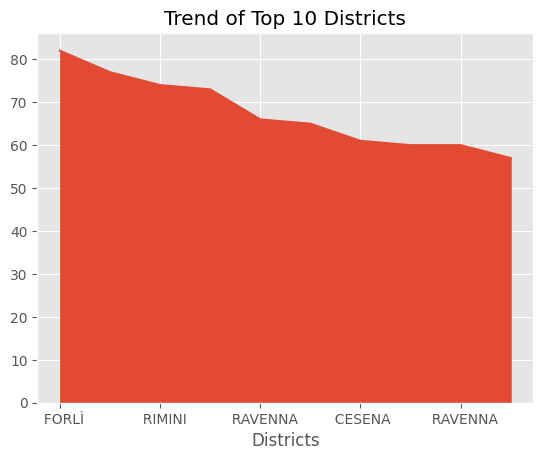

In [182]:
df_top10.plot(kind= 'area')
#fig = plt.figure(figsize=(8,6))
plt.title("Trend of Top 10 Districts")
plt.xlabel("Numbers of Hospitalization")
plt.xlabel("Districts")

plt.show

# Histogram

In [184]:
df_test.sort_values(['Giorni di ricuvero'], ascending= False, axis= 0, inplace= True)

df_top10 = df_test.head(10)


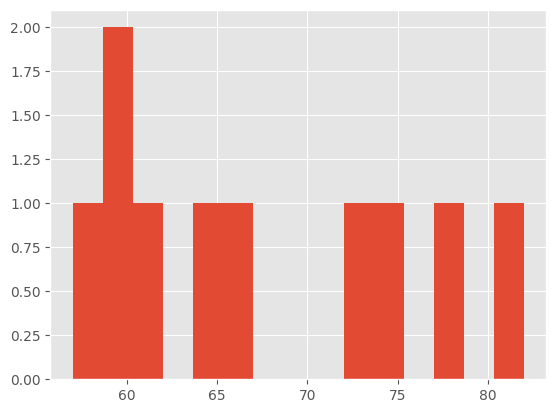

In [185]:
plt.hist(df_top10['Giorni di ricuvero'], bins=15)
plt.show()

## BoxPlot

In [116]:
import seaborn as sns

In [186]:
df_test.describe()


,Giorni di ricuvero
count,7142.000000
mean,4.761131
std,7.664551
min,0.000000
25%,0.000000
50%,0.000000
75%,8.000000
max,82.000000


<Axes: >

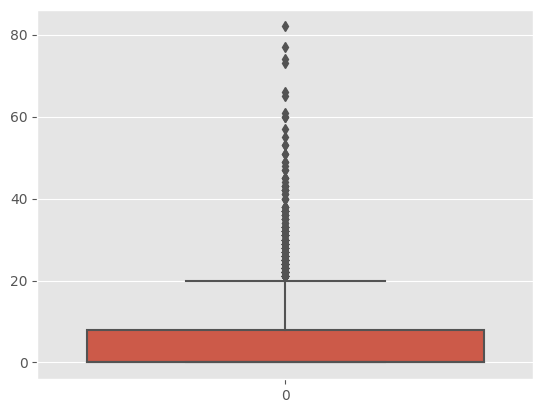

In [187]:
sns.boxplot(df_test['Giorni di ricuvero'])

**Coding:**                                    May 2023

**Marcos José Rodrigues de Souza**

***Public Health Specialist***